In [7]:
##import pandas_datareader.data as web

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import statsmodels.api as sms

In [9]:
df=pd.read_csv('DailyDelhiClimateTimeseries.csv')

In [10]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [11]:
df.index

RangeIndex(start=0, stop=1462, step=1)

<AxesSubplot:>

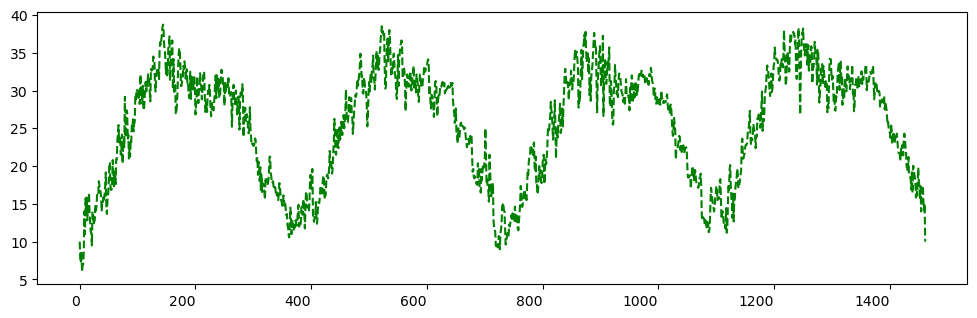

In [12]:
figure,axis=plt.subplots()
figure.autofmt_xdate()
df['meantemp'].plot(figsize=(12,4),c='green',ls='--')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [14]:
df['date']=pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [16]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [17]:
df=df.set_index('date',drop=True)

In [18]:
## Date Time

In [19]:
from datetime import datetime

In [20]:
datetime.now()

datetime.datetime(2023, 8, 6, 16, 9, 43, 482372)

In [21]:
def add_num(num1,num2):
    return num1+num2

In [22]:
start_time=datetime.now()
add_num(10,20)
end_time=datetime.now()
print (start_time-end_time)

0:00:00


In [23]:
datetime.date

<method 'date' of 'datetime.datetime' objects>

## Time Resampling

In [24]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


<AxesSubplot:xlabel='date'>

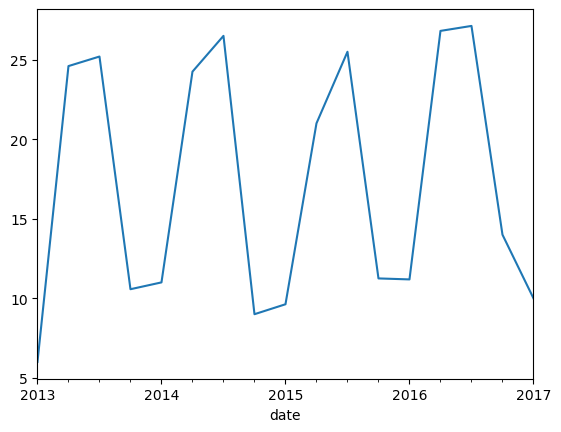

In [25]:
df.resample(rule='QS').min()['meantemp'].plot() ## Quater result

<AxesSubplot:xlabel='date'>

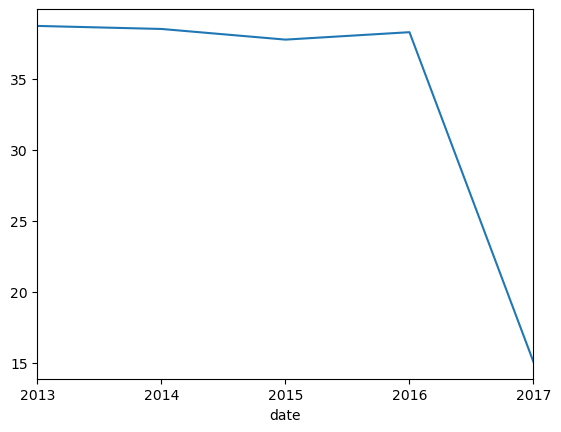

In [26]:
df.resample(rule='BA').max()['meantemp'].plot() ## Quater result

<AxesSubplot:xlabel='date'>

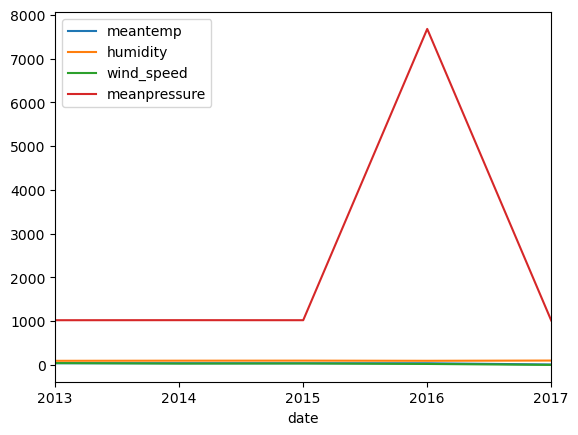

In [27]:
df.resample(rule='A').max().plot()

<AxesSubplot:xlabel='date'>

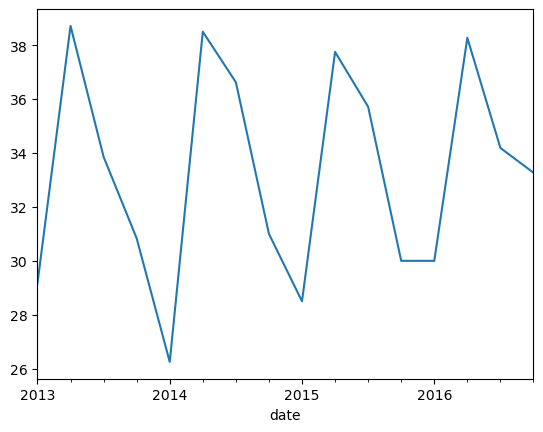

In [28]:
df.resample(rule='BQS').max()['meantemp'].plot() ## Business Quater result

<AxesSubplot:xlabel='date'>

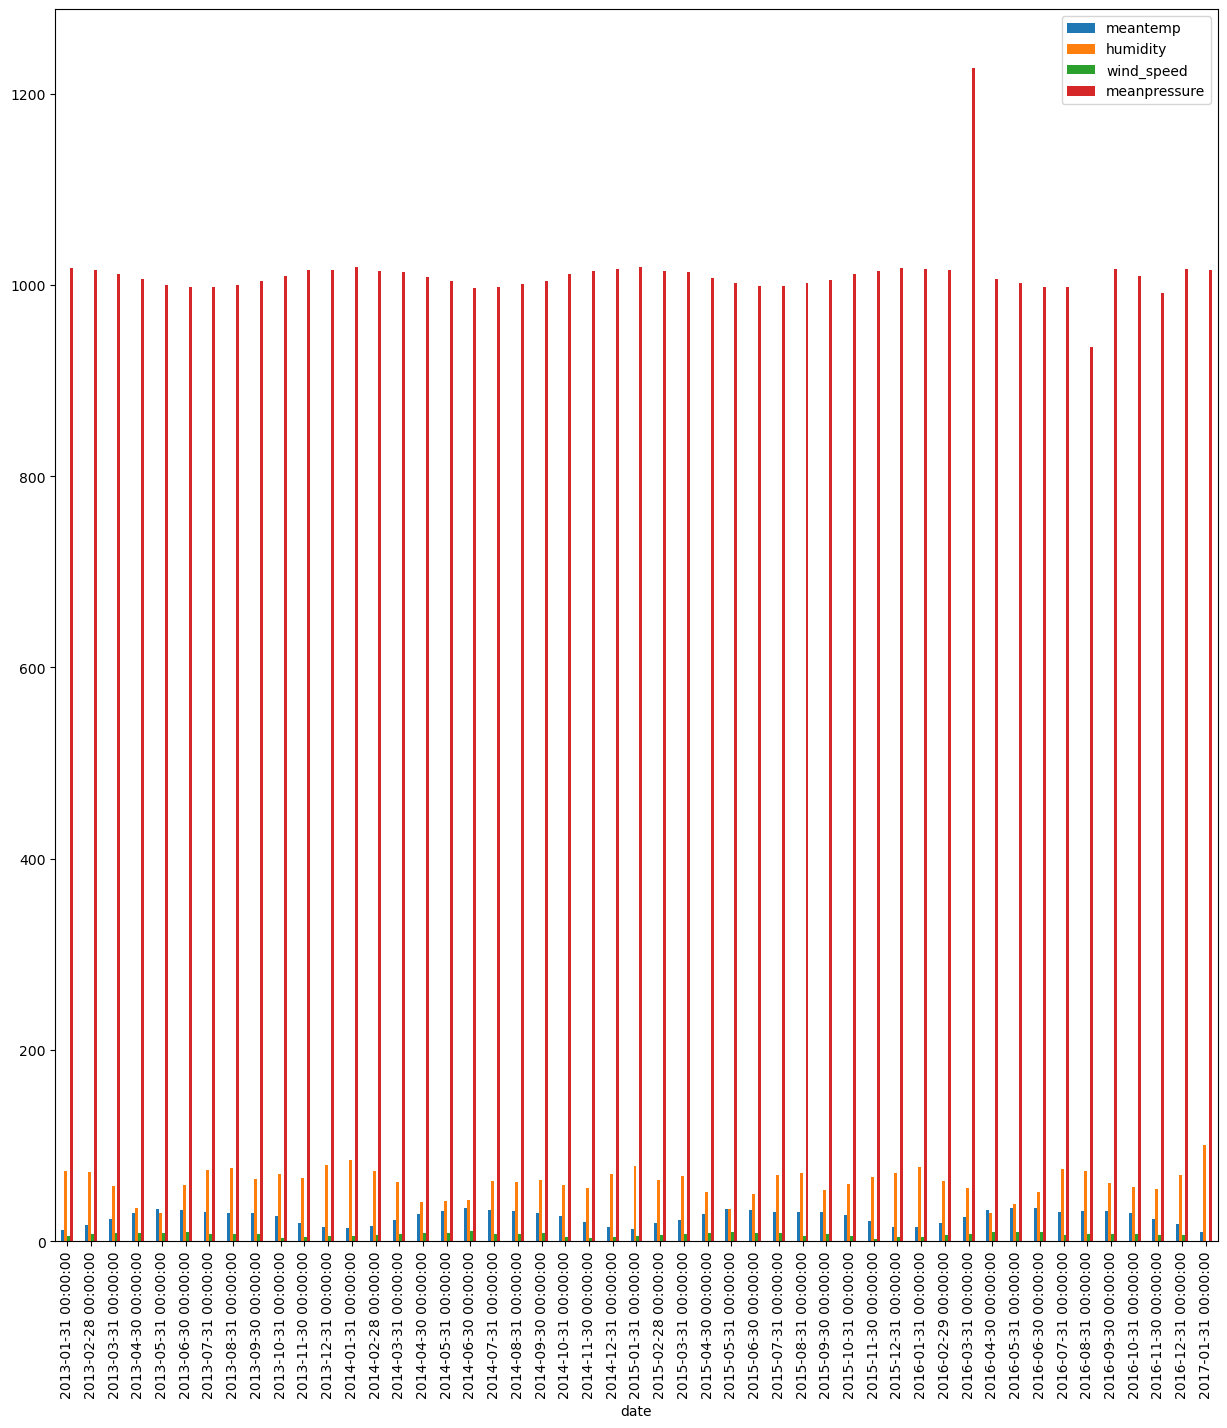

In [29]:
df.resample(rule='M').mean().plot(kind='bar',figsize=(15,16))

## Rolling & Expanding

In [30]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [31]:
df['meantemp'].rolling(10).mean()

date
2013-01-01          NaN
2013-01-02          NaN
2013-01-03          NaN
2013-01-04          NaN
2013-01-05          NaN
                ...    
2016-12-28    17.107129
2016-12-29    16.845224
2016-12-30    16.274748
2016-12-31    15.975011
2017-01-01    15.246440
Name: meantemp, Length: 1462, dtype: float64

<AxesSubplot:xlabel='date'>

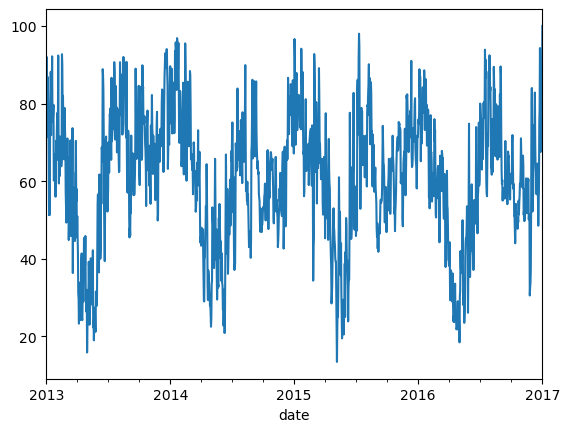

In [32]:
df['humidity'].plot()

In [ ]:
# Simple Moving average

<AxesSubplot:xlabel='date'>

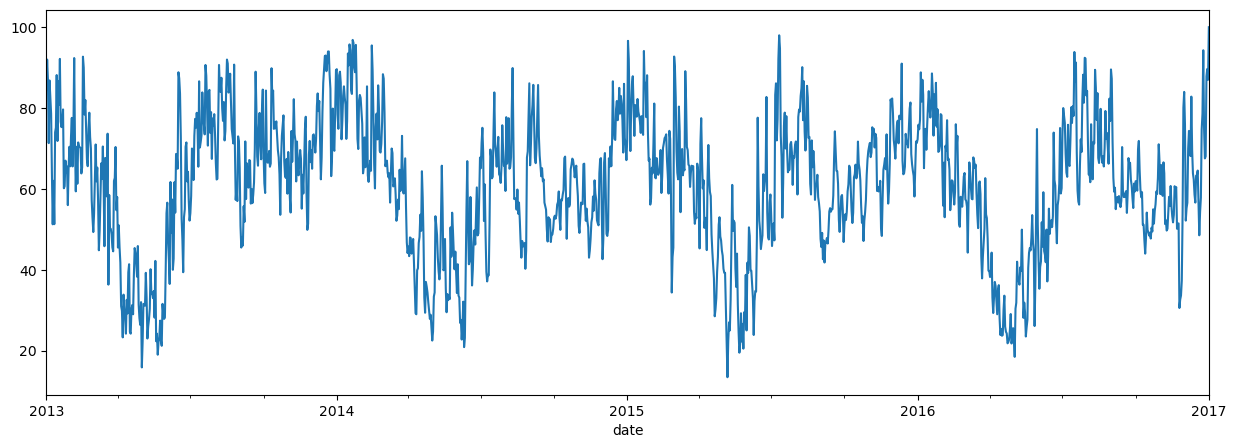

In [36]:
df['humidity'].plot(figsize=(15,5))

In [48]:
df["Open:10 days rolling"]=df['humidity'].rolling(window=10,min_periods=1).mean()
df["Open:30 days rolling"]=df['humidity'].rolling(window=30,min_periods=1).mean()

<AxesSubplot:xlabel='date'>

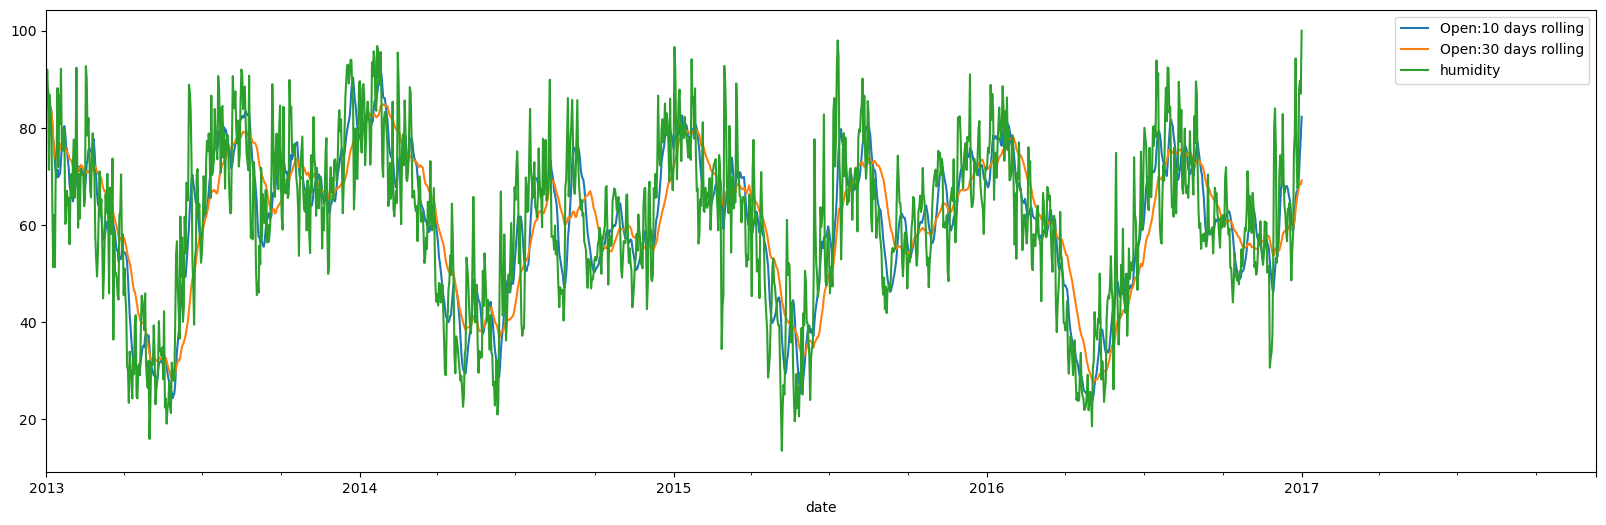

In [50]:
df[['Open:10 days rolling','Open:30 days rolling','humidity']].plot(xlim=['2013-01-01','2017-12-10'],figsize=(20,6))

In [ ]:
#Cumulative Moving Average

<AxesSubplot:xlabel='date'>

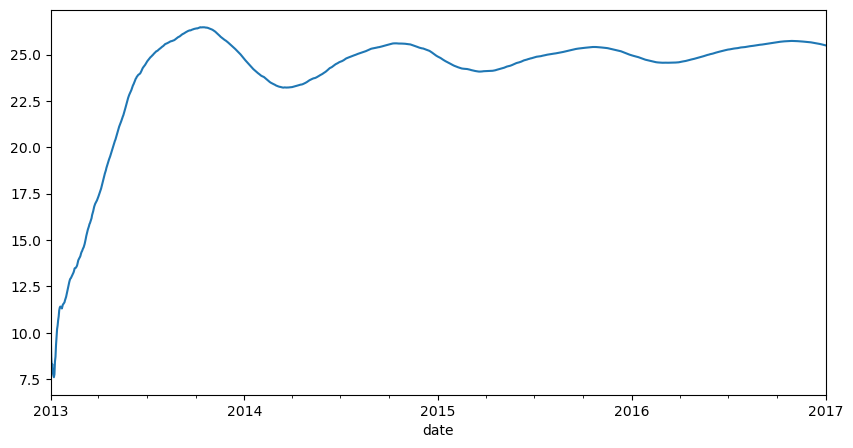

In [52]:
df['meantemp'].expanding().mean().plot(figsize=(10,5))

In [ ]:
# Exponential weighted moving average

In [53]:
df['EWA0.1']=df['meanpressure'].ewm(alpha=0.1,adjust=False).mean()

In [56]:
df['EWA0.1']=df['meantemp'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='date'>

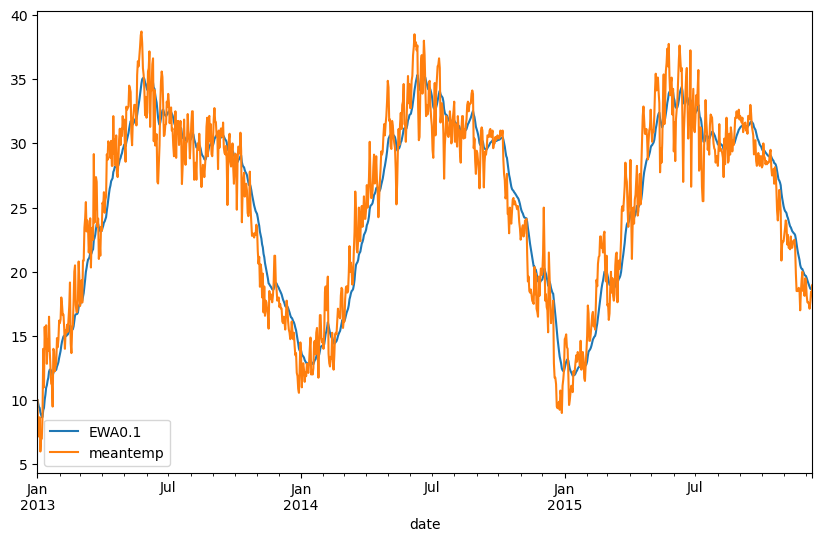

In [59]:
df[['EWA0.1','meantemp']].plot(xlim=['2013-01-01','2015-12-10'],figsize=(10,6))

In [61]:
df['EWA0.1_5 days']=df['meantemp'].ewm(span=5).mean()

<AxesSubplot:xlabel='date'>

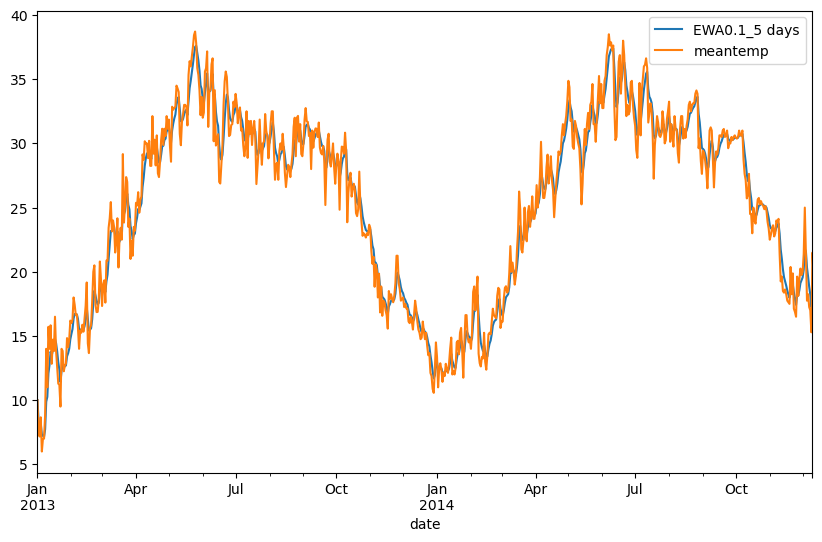

In [63]:
df[['EWA0.1_5 days','meantemp']].plot(xlim=['2013-01-01','2014-12-10'],figsize=(10,6))

## ARIMA model

In [92]:
df_airline=pd.read_csv('AirPassengers.csv')

In [66]:
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [93]:
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [69]:
df_airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [70]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [94]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [95]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [75]:
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [96]:
df_airline.set_index('Month',inplace=True)

In [97]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

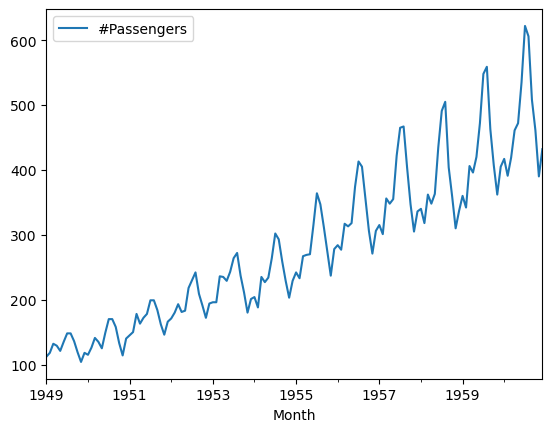

In [79]:
df_airline.plot()

In [98]:
from statsmodels.tsa.stattools import adfuller

In [114]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print("Strong evidence aganist the null hypothesis, reject the null hypothesis, this is  stationary data with unit root")
    else:
        print("Weak evidence aganist the null hypothesis, rejest  the null hypothesis. This is not stationary date with no unit root")

In [100]:
adf_test(df_airline['#Passengers'])

ADF Statistics:0.8153688792060502
p-value:0.991880243437641
Strong evidence aganist the null hypothesis, reject the null hypothesis


## Use Technique Diffrencing

In [101]:
df_airline['#Passengers first Diffrence']=df_airline["#Passengers"]-df_airline["#Passengers"].shift(1)

In [102]:
df_airline.head()

,#Passengers,#Passengers first Diffrence
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [115]:
adf_test(df_airline['#Passengers first Diffrence'].dropna())

ADF Statistics:-2.829266824170006
p-value:0.05421329028382468
Weak evidence aganist the null hypothesis, rejest  the null hypothesis. This is not stationary date with no unit root


In [116]:
df_airline['#Passengers second Diffrence']=df_airline["#Passengers first Diffrence"]-df_airline["#Passengers first Diffrence"].shift(1)

In [124]:
df_airline.head()

,#Passengers,#Passengers first Diffrence,#Passengers second Diffrence,#Passengers 12 Diffrence
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [118]:
adf_test(df_airline['#Passengers second Diffrence'].dropna())

ADF Statistics:-16.384231542468527
p-value:2.732891850014085e-29
Strong evidence aganist the null hypothesis, reject the null hypothesis, this is  stationary data with unit root


In [119]:
df_airline['#Passengers 12 Diffrence']=df_airline["#Passengers"]-df_airline["#Passengers"].shift(12)

In [120]:
adf_test(df_airline['#Passengers 12 Diffrence'].dropna())

ADF Statistics:-3.3830207264924805
p-value:0.011551493085514982
Strong evidence aganist the null hypothesis, reject the null hypothesis, this is  stationary data with unit root


In [121]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

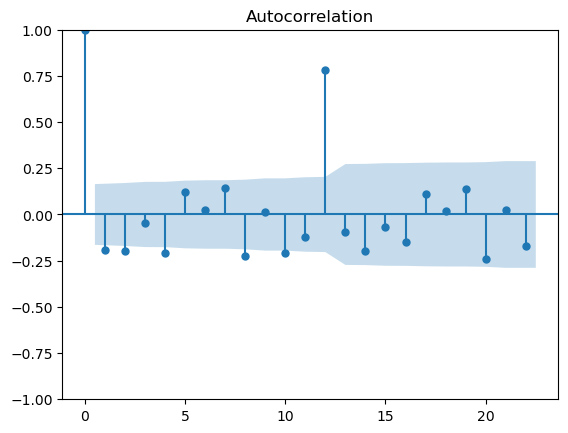

In [123]:
acf=plot_acf(df_airline["#Passengers second Diffrence"].dropna())

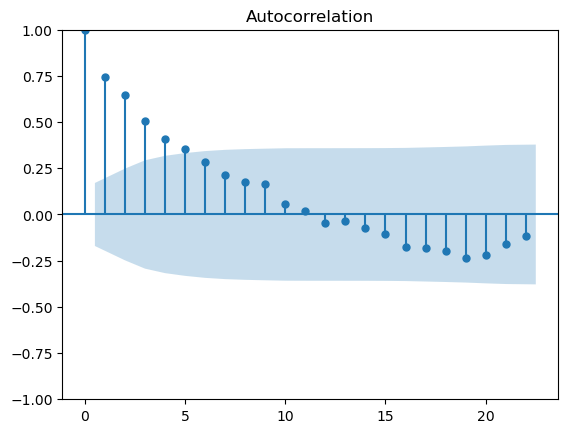

In [126]:
 acf_12=plot_acf(df_airline["#Passengers 12 Diffrence"].dropna())

C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


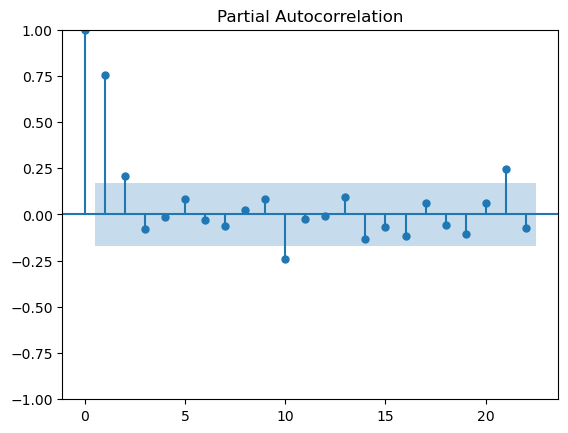

In [127]:
pacf_12=plot_pacf(df_airline["#Passengers 12 Diffrence"].dropna())

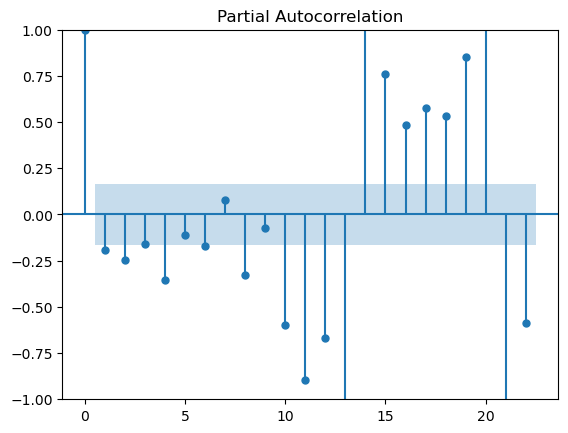

In [128]:
pacf_2=plot_pacf(df_airline["#Passengers second Diffrence"].dropna())

In [129]:
## Split train data test data

df_airline

,#Passengers,#Passengers first Diffrence,#Passengers second Diffrence,#Passengers 12 Diffrence
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [130]:
from datetime import datetime,timedelta

train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [131]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [132]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [133]:
test_data

,#Passengers,#Passengers first Diffrence,#Passengers second Diffrence,#Passengers 12 Diffrence
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [142]:
# ARIMA model

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [136]:
train_data

,#Passengers,#Passengers first Diffrence,#Passengers second Diffrence,#Passengers 12 Diffrence
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [145]:
model_ARIMA=ARIMA(train_data["#Passengers"],order=(10,2,12))

C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [147]:
model_ARIMA=model_ARIMA.fit()

C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\MODASUD\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:               ARIMA(10, 2, 12)   Log Likelihood                -307.731
Date:                Sun, 06 Aug 2023   AIC                            661.463
Time:                        22:48:41   BIC                            716.817
Sample:                    01-01-1949   HQIC                           683.687
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0467      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0428      0.083    -12.492      0.000      -1.206      -0.879
ar.L3          0.0884      0.139      0.638      0.524      -0.183       0.360
ar.L4         -1.0255      0.131     -7.834      0.000      -1.282      -0.769
ar.L5          0.0655      0.155      0.422      0.673      -0.238       0.370
ar.L6         -0.9857      0.143     -6.873      0.000      -1.267      -0.705
ar.L7          0.0173      0.142      0.122      0.903      -0.261       0.296
ar.L8         -0.9821      0.123     -8.008      0.000      -1.222      -0.742
ar.L9         -0.0070      0.095     -0.073      0.941      -0.193       0.179
ar.L10        -0.9389      0.085    -11.070      0.000      -1.105      -0.773
ma.L1         -1.2856      0.254     -5.062      0.000      -1.783      -0.788
ma.L2          1.2389      0.358      3.458      0.001       0.537       1.941
ma.L3         -1.4405      0.436     -3.306      0.001      -2.295      -0.586
ma.L4          1.3743      0.506      2.716      0.007       0.383       2.366
ma.L5         -1.2147      0.574     -2.118      0.034      -2.339      -0.091
ma.L6          1.0819      0.660      1.640      0.101      -0.211       2.375
ma.L7         -1.0690      0.715     -1.496      0.135      -2.469       0.331
ma.L8          0.8852      0.819      1.081      0.280      -0.720       2.491
ma.L9         -0.7847      0.737     -1.065      0.287      -2.229       0.659
ma.L10         0.5233      0.601      0.870      0.384      -0.655       1.702
ma.L11        -0.4133      0.455     -0.909      0.364      -1.305       0.478
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2060     16.188      4.769      0.000      45.478     108.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
##Prediction

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [153]:
pred=model_ARIMA.predict(start=pred_start_date,end=pred_end_date)
residual=test_data["#Passengers"]-pred

In [154]:
residual

Month
1956-01-01      0.752176
1956-02-01      7.502609
1956-03-01     21.836309
1956-04-01     14.432851
1956-05-01     18.903564
1956-06-01     28.648512
1956-07-01     24.512045
1956-08-01     33.109108
1956-09-01     14.927918
1956-10-01      3.084377
1956-11-01     -0.824677
1956-12-01      3.358117
1957-01-01      3.914132
1957-02-01      7.220501
1957-03-01     39.083311
1957-04-01     23.517461
1957-05-01     28.907381
1957-06-01     49.306800
1957-07-01     50.435345
1957-08-01     70.444824
1957-09-01     38.718117
1957-10-01     14.744393
1957-11-01      2.452829
1957-12-01      6.517600
1958-01-01      1.446429
1958-02-01     -0.362599
1958-03-01     23.116271
1958-04-01     -2.472164
1958-05-01      9.783886
1958-06-01     35.440868
1958-07-01     50.498552
1958-08-01     83.699800
1958-09-01     13.340122
1958-10-01     -2.625245
1958-11-01    -23.226294
1958-12-01    -19.327045
1959-01-01     -5.705287
1959-02-01     -1.218078
1959-03-01     44.903418
1959-04-01     19.5

<AxesSubplot:ylabel='Density'>

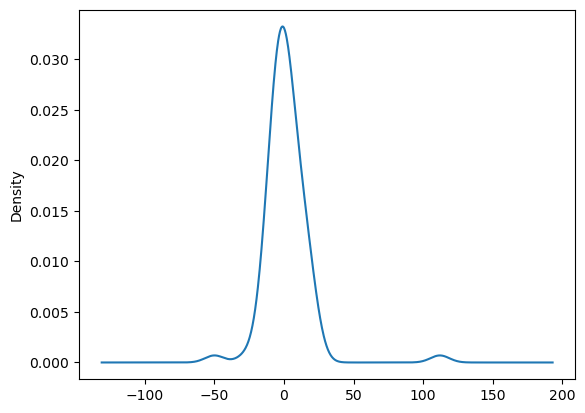

In [156]:
model_ARIMA.resid.plot(kind='kde')